In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga
from ctypes import ArgumentError

In [2]:
def f_1(x_arr):
    x, y = x_arr
    r = (x-0.5)**2 + (y-0.5)**2
    n = 9
    s = 0.15
    return -1 * np.cos(n*np.pi*np.sqrt(r))**2 * np.exp(-r/s)

def f_2(x_arr):
    x, y = x_arr
    r_1 = (x-0.5)**2 + (y-0.5)**2
    r_2 = (x-0.6)**2 + (y-0.1)**2
    return -0.8*np.exp(-r_1/0.3**2) + 0.879008*np.exp(-r_2/0.03**2)
    

Function 1:
__________________________________________________ 0.2% GA is running...

 The best solution found:                                                                           
 [0.49998706 0.5000037 ]

 Objective function:
 -0.9999998539586274


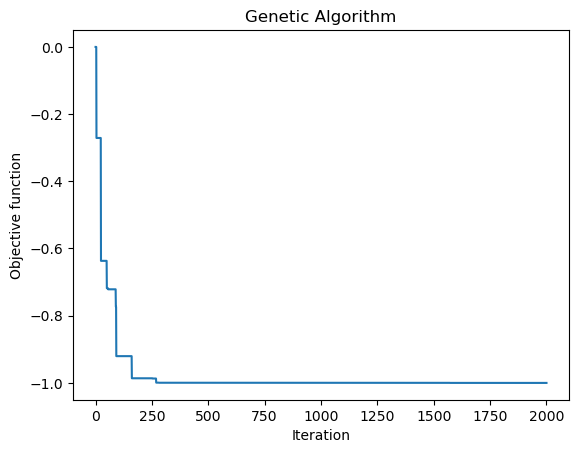

Function 2:
 The best solution found:                                                                           
 [0.50001825 0.50001963]

 Objective function:
 -0.7999999936136399


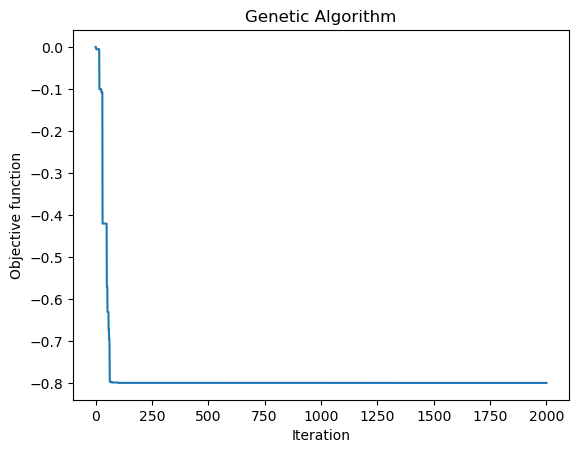

{'variable': array([0.49998706, 0.5000037 ]), 'function': -0.9999998539586274}
{'variable': array([0.50001825, 0.50001963]), 'function': -0.7999999936136399}


In [3]:
varbound = np.array([[-10, 10]] * 2)

model_1 = ga(function=f_1, dimension=2, variable_type='real', variable_boundaries=varbound)
model_2 = ga(function=f_2, dimension=2, variable_type='real', variable_boundaries=varbound)


print("Function 1:")
model_1.run()
convergence_1 = model_1.report
solution_1 = model_1.output_dict

print("Function 2:")
model_2.run()
convergence_2 = model_2.report
solution_2 = model_2.output_dict

print(solution_1)
print(solution_2)

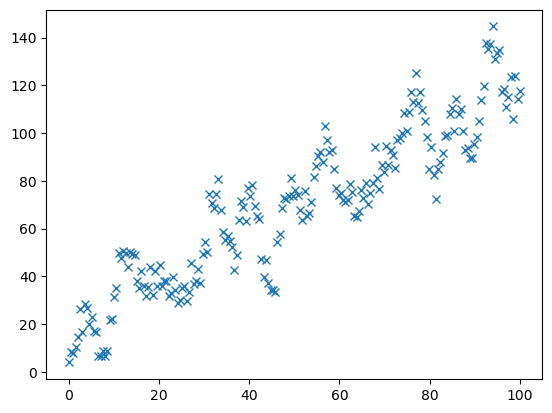

In [4]:
lichtkurve = np.loadtxt("lichtkurve.dat")
# print(lichtkurve.shape)
plt.plot(lichtkurve[:,0], lichtkurve[:,1], marker="x", linestyle="")
plt.show()

 The best solution found:                                                                           
 [ 1.04230353 17.14699067]

 Objective function:
 1279.2219664417566


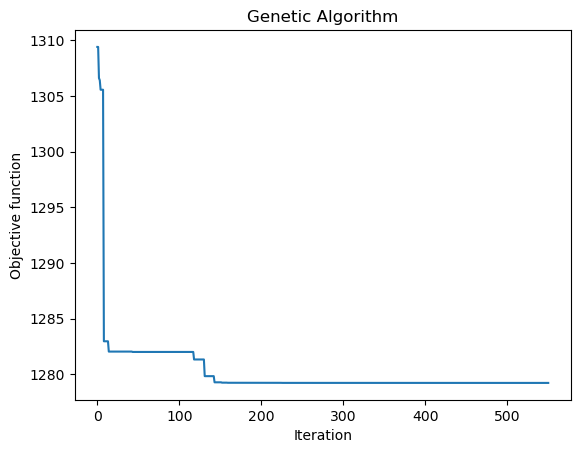

In [5]:
def linear(x, a, b):
    return a*x + b

def Xi_sq_linear(x):
    a,b = x
    frac = ((lichtkurve[:,1] - linear(lichtkurve[:,0], a, b))/5)**2
    return np.sum(frac)


varbound = np.array([[0,3], [17,25]])

lin_gen = ga(function=Xi_sq_linear, dimension=2, variable_type='real', variable_boundaries=varbound)

lin_gen.run()


1.0423035297628738 17.14699067003299
1279.2219664417566


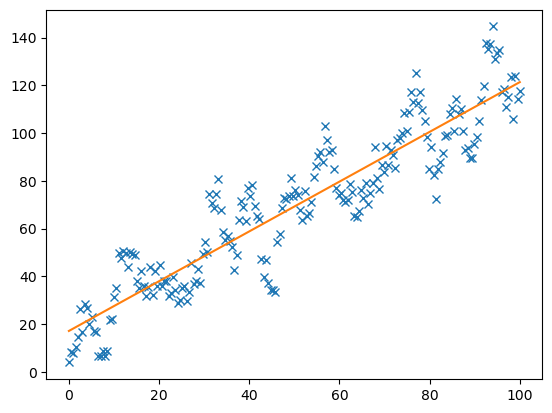

In [6]:
x = np.linspace(0,100, 1000)
plt.plot(lichtkurve[:,0], lichtkurve[:,1], marker="x", linestyle="")
plt.plot(x, linear(x, *lin_gen.output_dict["variable"]))
print(*lin_gen.output_dict["variable"])
print(Xi_sq_linear(lin_gen.output_dict["variable"]))

In [7]:


# model_1 = ga(function=f_1, dimension=2, variable_type='real', variable_boundaries=varbound)
# model_2 = ga(function=f_2, dimension=2, variable_type='real', variable_boundaries=varbound)


# print("Function 1:")
# model_1.run()
# convergence_1 = model_1.report
# solution_1 = model_1.output_dict


def gen_min(func, nr_sins):
    nr_parameters = 2 + 3*nr_sins

    varbound = [[0,5],[15,25]]
    amp_bound = [0,100]
    per_bound = [lichtkurve[1,0]- lichtkurve[0,0], 50]
    phase_bound = [0,1]
    for i in range(nr_sins):
        varbound.append(amp_bound)
        varbound.append(per_bound)
        varbound.append(phase_bound)
    varbound = np.array(varbound)

    model = ga(func, dimension=nr_parameters, variable_type="real", variable_boundaries=varbound)
    model.run()
    return model.output_dict["variable"]

In [8]:
def linear_sinusoidal(x, params):
    a, b = params[:2]
    linear_part = a * x + b
    
    amplitudes = params[2::3]
    periods = params[3::3]
    phases = params[4::3]

    if not (len(amplitudes) == len(periods) and len(periods) == len(phases)):
        raise ArgumentError
    
    sin_part = 0
    for i in range(len(amplitudes)):
        sin_part += amplitudes[i]*np.sin(2*np.pi*(x/periods[i] + phases[i]))
    
    return linear_part + sin_part

def chi_sq(params):
    frac = (lichtkurve[:, 1]-linear_sinusoidal(lichtkurve[:,0], params))/5
    return np.sum(frac**2)


Fitting 1 sin:
__________________________________________________ 0.0% GA is running...

 The best solution found:                                                                           
 [ 0.99864169 19.34068321 11.42325283 20.1044668   0.52347915]

 Objective function:
 769.7268353846091


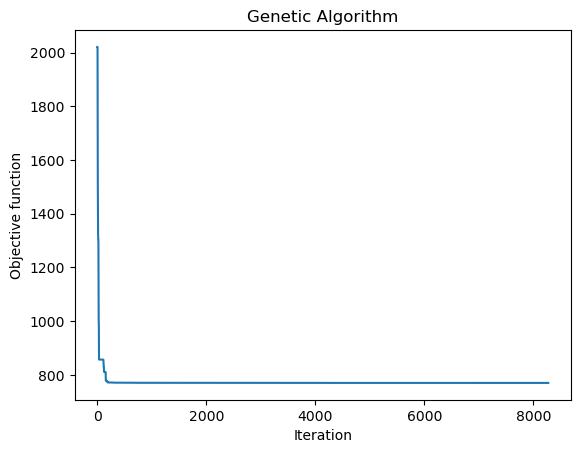

Fitting 2 sin:
 The best solution found:                                                                           
 [ 1.00653176 19.06861958 10.20691126  9.00781363  0.8090386  11.45945842
 20.12771075  0.52263077]

 Objective function:
 352.89159806785494


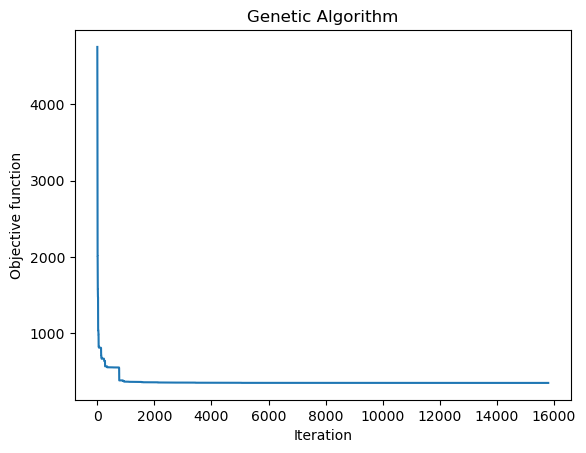

Fitting 3 sin:
|||||||||||||||||||||||||||||||||||||||||||||||||_ 98.0% GA is running...

In [ ]:
param_opt = {}
chi_sq_opt = {}
for i in range(1,5):
    print(f"Fitting {i} sin:")
    param_opt[i] = gen_min(chi_sq, i)
    chi_sq_opt[i] = chi_sq(param_opt[i])

    

In [ ]:
print(param_opt)

{1: array([ 0.99755353, 19.39805952, 11.46877093, 20.06067181,  0.51741131]), 2: array([ 1.00879662, 18.93839007, 11.46308929, 20.15338247,  0.5245126 ,
       10.21515849,  9.00604537,  0.80824793]), 3: array([ 1.00598072, 19.06757604, 11.47057664, 20.33552281,  0.54844968,
        6.70804467,  7.49205857,  0.81708938,  9.83085616,  9.05337543,
        0.83144451]), 4: array([ 1.02060224, 18.28880108,  6.60763577,  7.42214245,  0.74607032,
        9.59944203,  9.10855155,  0.8655961 ,  5.19904983, 21.51143422,
        0.67751771,  7.77338134, 19.54975539,  0.45356336])}


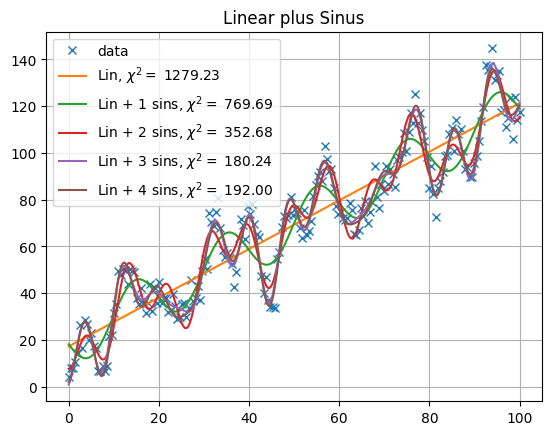

In [ ]:
x = np.linspace(0,100, 1000)
plt.plot(lichtkurve[:,0], lichtkurve[:,1], marker="x", linestyle="", label="data")

plt.plot(x, linear(x, *lin_gen.output_dict["variable"]), label=fr"Lin, $\chi^2 =$ {Xi_sq_linear(lin_gen.output_dict["variable"]):.2f}")

plt.grid()

plt.title("Linear plus Sinus")

for i in range(1,5):
    plt.plot(x, linear_sinusoidal(x, param_opt[i]), label=fr"Lin + {i} sins, $\chi^2 = $ {chi_sq_opt[i]:.2f}")

plt.legend()

In [ ]:
from tabulate import tabulate


table=[[param_opt[3][0], param_opt[3][1],   1, param_opt[3][2], param_opt[3][3], param_opt[3][4]],
       [None,           None,               2, param_opt[3][5], param_opt[3][6], param_opt[3][7]],
       [None,           None,               3, param_opt[3][8], param_opt[3][9], param_opt[3][10]]
        ]

head = ["a", "b", "m", r"$A_m$", r"$P_m$", r"$\Phi_m$"]

print(tabulate(table, headers=head, tablefmt="latex_raw"))

\begin{tabular}{rrrrrr}
\hline
       a &       b &   m &    $A_m$ &    $P_m$ &   $\Phi_m$ \\
\hline
 1.00598 & 19.0676 &   1 & 11.4706  & 20.3355  &   0.54845  \\
         &         &   2 &  6.70804 &  7.49206 &   0.817089 \\
         &         &   3 &  9.83086 &  9.05338 &   0.831445 \\
\hline
\end{tabular}
